# 프로토타입에 필요한 함수 생성 및 분석 (KT AIVLE 빅프로젝트)
- 데이터 간 상관 관계를 확인하고 무엇을 뽑아낼 수 있을지 고민해보자.
- 웹 화면에서 잘 동작하기 위한 함수를 생성해보자.
- 웹 화면에 표시할 지도 함수를 생성해보자.
- 데이터를 이용하여 그래프를 어디에 사용하면 좋을 지 생각해보자.
- 생성한 함수들 정리하자.

## 1. 제공현황데이터

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 경고 제거
import warnings
warnings.filterwarnings("ignore")

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')

data1 = pd.read_csv('5. 부산제공현황통계데이터(2017~2022년).csv', encoding='cp949')
data1.tail(2)

In [ ]:
data1['기부물품대분류코드'].unique()

In [ ]:
data1[data1['기부물품대분류코드']=='의류/패션잡화']

## 2. 기부자정보 데이터

In [ ]:
main_val = {'S02501':'부산광역푸드뱅크',
            'S03701':'강서구기초푸드뱅크',
            'S64801':'강서구기초푸드마켓',
            'S03601':'금정구기초푸드뱅크',
            'S51401':'금정구푸드마켓',
            'S04101':'기장군기초푸드뱅크',
            'S63901':'기장군기초푸드마켓',
            'S03201':'남구기초푸드뱅크',
            'S48201':'남구기초푸드마켓',
            'S02801':'동구기초푸드뱅크',
            'S64001':'동구기초푸드마켓',
            'S03101':'동래구기초푸드뱅크',
            'S40001':'동래구기초푸드마켓',
            'S03001':'부산진구기초푸드뱅크',
            'S50701':'부산진구기초푸드마켓',
            'S03301':'북구기초푸드뱅크',
            'S40101':'북구기초푸드마켓',
            'S63301':'사상구기초푸드뱅크',
            'S51601':'사상구기초푸드마켓',
            'S03501':'부산사하기초푸드뱅크',
            'S50101':'사하구기초푸드마켓',
            'S02701':'서구기초푸드뱅크',
            'S40301':'서구기초푸드마켓',
            'S03901':'수영구기초푸드뱅크',
            'S58201':'수영구기초푸드마켓',
            'S03801':'연제구기초푸드뱅크',
            'S64701':'연제구기초푸드마켓',
            'S02901':'영도구기초푸드뱅크',
            'S51501':'영도구기초푸드마켓',
            'S02601':'중구기초푸드뱅크',
            'S49001':'중구기초푸드마켓',
            'S03401':'해운대기초푸드뱅크',    
            'S40201':'해운대기초푸드마켓',    
}

In [137]:
data2 = pd.read_csv('3.부산기부자정보조회(2016~2021년).csv', encoding='cp949')
data2.tail()

,기준년월,지역코드,통합시군구코드,지원센터코드,기부자구분코드,기부사업장종류코드,기부자명,기부금액,기부건수,기부자수
19594,202112,부산,연제구,S64701,개인,일반가정,개인기부자,600000.0,5,5
19595,202112,부산,연제구,S64701,기업(개인사업자),"식품 도,소매업",하나유통,1428330.0,2,1
19596,202112,부산,연제구,S64701,기업(개인사업자),기타,중앙철재,200000.0,1,1
19597,202112,부산,강서구,S64801,단체,"식품제조,가공업",부산광역시농업기술센터,500000.0,3,1
19598,202112,부산,강서구,S64801,기업(개인사업자),"식품제조,가공업",코우테이,176000.0,1,1


In [138]:
data2['지원센터코드'] = data2['지원센터코드'].map(main_val)

In [146]:
df = data2.groupby('지원센터코드', as_index=False)['기부금액', '기부자수'].sum()

In [147]:
df.tail()

,지원센터코드,기부금액,기부자수
28,영도구기초푸드뱅크,3.955806e+08,346
29,중구기초푸드마켓,1.721331e+09,235
30,중구기초푸드뱅크,2.295899e+08,169
31,해운대기초푸드마켓,2.009907e+09,1015
32,해운대기초푸드뱅크,2.343112e+09,1353


In [140]:
data2.corr()

,기준년월,기부금액,기부건수,기부자수
기준년월,1.000000,0.016959,-0.013438,0.000209
기부금액,0.016959,1.000000,0.050731,0.003141
기부건수,-0.013438,0.050731,1.000000,0.021082
기부자수,0.000209,0.003141,0.021082,1.000000


In [ ]:
data2.info()

In [ ]:
union_gugun = {
3000001:'중구',
3000002:'서구',
3000003:'동구',
3000004:'영도구',
3000005:'부산진구',
3000006:'동래구',
3000007:'남구',
3000008:'북구',
3000009:'해운대구',
3000010:'사하구',
3000011:'금정구',
3000012:'강서구',
3000013:'연제구',
3000014:'수영구',
3000015:'사상구',
3000100:'기장군' 
}

In [ ]:
data2.isna().sum()

## 3. 분석데이터(기부금액을 추가 했을 때 상관관계 확인)

In [136]:
data3 = pd.read_csv('분석전체데이터.csv', encoding='cp949')
data3.tail()

,지원센터코드,지원센터주소,년,접수금액,제공금액,인수금액,이관금액,이용자수,장부금액,장부수량,기부자수,기부건수,제공건수,사업장유형
120,해운대기초푸드마켓,부산광역시 해운대구 재반로 79(재송동),2021,423550224.0,413706176.5,86349843,49375954,7875,423550224.0,105002,217,803,30636,1
121,해운대기초푸드뱅크,부산 해운대구 재송1동,2017,251652753.0,299552303.0,47899536,0,985,251652753.0,137557,162,3197,10156,1
122,해운대기초푸드뱅크,부산 해운대구 재송1동,2019,369710065.0,407069506.7,46655561,9296136,1184,369710065.0,174470,224,4793,16249,1
123,해운대기초푸드뱅크,부산 해운대구 재송1동,2020,542049942.0,667062331.4,139893506,10900000,327,542049942.0,175586,278,4876,5969,1
124,해운대기초푸드뱅크,부산 해운대구 재송1동,2021,639708386.0,784450164.0,146049627,3280111,434,639708386.0,273401,359,6049,7414,1


In [ ]:
df1 = data3[data3['년'] == 2021]

In [ ]:
merge_df = pd.merge(df1, df, how='inner', on = '지원센터코드')

In [ ]:
merge_df.drop('년', axis=1, inplace=True)

In [ ]:
merge_df.corr()

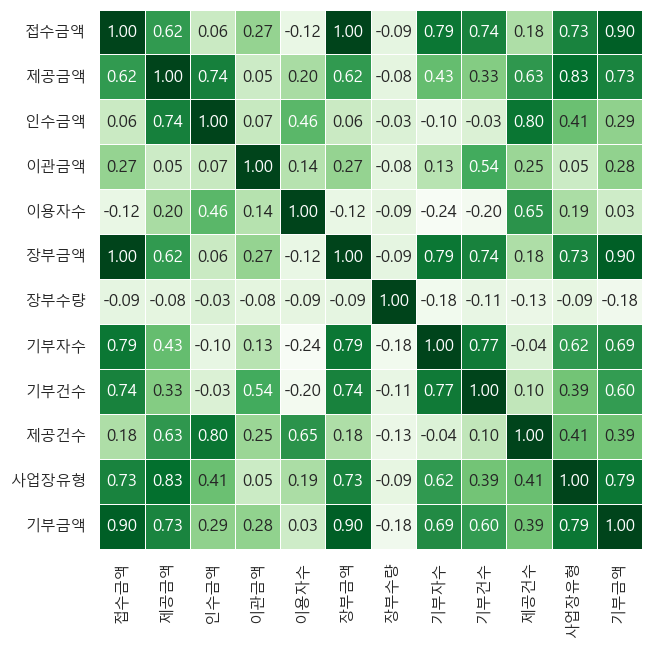

In [135]:
plt.figure(figsize=(7,7))
sns.heatmap(merge_df.corr(), annot=True, cmap='Greens', linewidths=.5, cbar=False, fmt=".2f")
plt.show()

## 분석 결과 1
- 기부금액과 접수금액(장부금액), 제공금액, 기부자(건)수, 사업장 유형은 상관 관계가 있음
- 사업장 유형과 접수, 제공금액 기부자수, 기부금액이 상관 관계가 있음
- 어쨌든간, 돈이 많이 들어오면(기부자수, 건수, 금액 등..) 당연하게 접수금액과 제공금액이 올라가 기부를 받는 사람이 많아진다.
- 또한, 돈이 많이 흘러 들어옴으로써 사업장에 많은 기부가 들어오게 되면(3억 이상)
- 사업장 유형이 임의에서 당연으로 전환이 되어야 한다. ---> 기부총량확대가 된다면 임의사업장도 당연사업장이 되는 것이 가속화 될 수 있다.

## 4. 지원금과 기부금액 간의 상관 관계를 확인해보자

In [ ]:
pd.set_option('display.max_columns', None)
data4 = pd.read_csv('NEW 제공사업장 실태조사서.csv', encoding='cp949')
data4.head(2)

In [145]:
data4 = data4[['사업장명', '신고기준', '보관창고면적(m^2)', '인력소계', '2021지원금', '2022지원금']]
data4.tail(2)

,사업장명,신고기준,보관창고면적(m^2),인력소계,2021지원금,2022지원금
31,해운대기초푸드뱅크,당연,16.82,3,39000,40000
32,해운대기초푸드마켓,당연,36.36,5,57200,60000


In [149]:
data4.rename(columns={'사업장명':'지원센터코드'}, inplace=True)

In [150]:
data4.tail(1)

,지원센터코드,신고기준,보관창고면적(m^2),인력소계,2021지원금,2022지원금
32,해운대기초푸드마켓,당연,36.36,5,57200,60000


In [151]:
merge_df2 = pd.merge(df, data4, on='지원센터코드', how='inner')

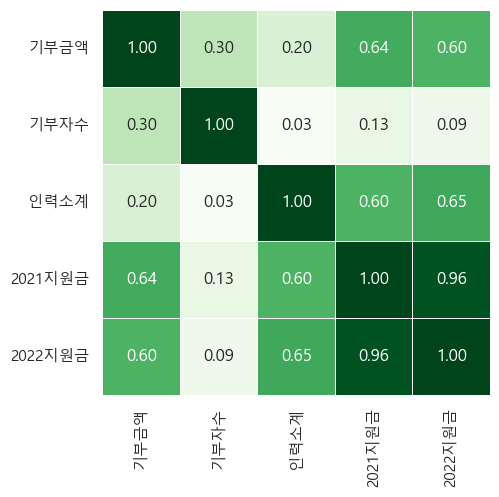

In [155]:
plt.figure(figsize=(5,5))
sns.heatmap(merge_df2.corr(), annot=True, cmap='Greens', linewidths=.5, cbar=False, fmt=".2f")
plt.show()

### 분석 결과 2
- 2개년도 기준 지원금을 보고 따졌을 때,
- 지원금과의 상관 관계를 보이는 컬럼 : 기부금액과 인력, 전년도 지원금
- 인력이 많으면 인건비가 나가기 때문에 그 만큼의 지원금이 들어오는 것으로 예상
- 기부금액이 많을수록 인력도 많이 필요하고 제공도 많이 하기에 지원금도 같이 많아짐으로 예상

## 5. 구별로 매핑해서 그래프 그려보기

In [ ]:
data2['통합시군구코드'] = data2['통합시군구코드'].map(union_gugun)

In [ ]:
# data2.to_csv('3.부산기부자정보조회(2016~2021년).csv', index=False, encoding='cp949')

In [ ]:
data2.head()

In [ ]:
grouping_gugun_money = data2.groupby(['통합시군구코드', '기부자명'], as_index=False)['기부금액'].sum()

In [ ]:
grouping_gugun_money

In [ ]:
grouping_gugun_money['기부금액'] = grouping_gugun_money['기부금액'].astype(int)

In [ ]:
grouping_gugun_money.to_csv('부산구별기부처(금액).csv', index=False, encoding='cp949')

In [ ]:
def grouping_gugun_money_graph20(gu):
        
    top20 = group_gugun_data[group_gugun_data['통합시군구코드'] == gu].sort_values('기부금액', ascending=False).head(20)
    fig = plt.figure()
    fig.set_dpi(300) # DPI 값을 조정하여 레티나 품질로 설정
    sns.barplot(data=top20, x='기부금액', y='기부자명')
    plt.show()

    return st.pyplot(fig)

In [ ]:
grouping_gugun = data2.groupby(['통합시군구코드', '기부자명'], as_index=False)['기부건수'].sum()

In [ ]:
grouping_gugun 

In [ ]:
grouping_gugun.to_csv('부산구별기부처.csv', index=False, encoding='cp949')

In [ ]:
def grouping_gugun_graph(gu):
    
    group_gugun_data = pd.read_csv('부산구별기부처.csv', encoding='cp949')
    top20 = group_gugun_data[group_gugun_data['통합시군구코드'] == gu].sort_values('기부건수', ascending=False).head(20)
    fig = plt.figure()
    sns.barplot(data=top20, x='기부건수', y='기부자명')
    plt.show()
    
    return st.pyplot(fig)

In [ ]:
grouping_gugun[grouping_gugun['통합시군구코드'] == '해운대구'].sort_values('기부건수', ascending=False).head(20)

In [ ]:
grouping_data = data2.groupby('기부자명', as_index=False)['기부건수'].sum()

In [ ]:
sort_data = grouping_data.sort_values(by='기부건수',ascending=False)
sort_data

In [ ]:
top21 = sort_data.head(21)

In [ ]:
top21.to_csv('기부건수 top21.csv', encoding='cp949')

In [ ]:
top5 = sort_data.head()

In [ ]:
top10 = sort_data.head(10)

In [ ]:
top20 = top21.iloc[1:]

In [ ]:
def top_donate_grahp():
    top21 = pd.read_csv('기부건수 top21.csv', encoding='cp949')
    top5 = top21.head()
    top20 = top21.iloc[1:]
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')

sns.barplot(y = top20['기부자명'], x = top20['기부건수'])
plt.show()

In [ ]:
sns.barplot(y = top5['기부자명'], x = top5['기부건수'])
plt.show()

In [ ]:
data2['기부자명'].nunique()

In [ ]:
unique_donors = data2.drop_duplicates(subset='기부자명')
unique_donors.reset_index(drop=True, inplace=True)

In [ ]:
unique_donors = unique_donors[['기부자구분코드', '기부사업장종류코드', '기부자명', '기부금액']]
unique_donors

In [ ]:
busan_donors = unique_donors.copy()

In [ ]:
busan_donors

In [ ]:
def find_busan_donors(search):
    busan_donors = pd.read_csv('부산기부처목록.csv', encoding='cp949')
    return busan_donors[busan_donors['기부자명'].str.contains(search)]

In [ ]:
find_busan_donors('어묵')

In [ ]:
unique_donors['기부금액'] = unique_donors['기부금액'].astype(int)

In [ ]:
unique_donors

### 부산 기부처 중복 제거 후 저장

In [ ]:
unique_donors.to_csv('부산기부처목록.csv', encoding='cp949', index=False)

In [ ]:
data2['기부사업장종류코드'].unique()

In [ ]:
def donate(needs):
    donate_info = pd.read_csv('3.부산기부자정보조회(2016~2021년).csv', encoding='cp949')
    if needs == '신선식품':
        matching = '식품 도,소매업'
    elif needs == '일상용품' or needs == '의류/패션잡화':
        matching = '즉선판매,제조가공업'
    else:
        matching = '기타'
    donater = donate_info[donate_info['기부사업장종류코드'] == matching]
    donater_list = list(donater['기부자명'].unique())
    return donater_list

In [ ]:
donate('스포츠')

In [ ]:
doso = data2[data2['기부사업장종류코드'] =='식품 도,소매업']
doso['기부자명'].unique()

In [ ]:
doso = data2[(data2['기부사업장종류코드'] =='식품제조,가공업') | (data2['기부사업장종류코드'] =='식품 도,소매업')]
len(doso['기부자명'].unique())

In [ ]:
group_store = data2[data2['기부사업장종류코드'] == '집단 급식소']

In [ ]:
group_store['기부자명'].unique()

In [ ]:
etc = data2[data2['기부사업장종류코드'] == '기타']
etc['기부자명'].unique()
# etc[etc['기부자명'].str.contains('쌀')]

In [ ]:
# 함수 생성
def inventory(code_name):
    test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
    test.set_index(test.columns[0], inplace=True)
    return test.loc[code_name, '재고수량']

In [ ]:
inventory('일상용품')

In [ ]:
test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
test

## 6. 새로운 기부처 발굴 데이터 생성

In [79]:
new = pd.read_csv('부산도소매업(전처리).csv', encoding='cp949')
pd.set_option('display.max_columns', None)

In [80]:
new.tail()

,Unnamed: 0,상호명,상권업종대분류명,표준산업분류명,시군구명,도로명주소,경도,위도
8145,8145,기린아식품,소매,"채소, 과실 및 뿌리작물 소매업",해운대구,부산광역시 해운대구 좌동로14번길 32,129.171069,35.167681
8146,8146,장가상회,소매,건어물 및 젓갈류 소매업,부산진구,부산광역시 부산진구 범일로142번길 39,129.061568,35.142820
8147,8147,떡봄시루,음식,떡류 제조업,연제구,부산광역시 연제구 과정로 207,129.104707,35.187531
8148,8148,호주면세점부산,소매,건강 보조식품 소매업,부산진구,부산광역시 부산진구 성지로 79,129.053699,35.177602
8149,8149,해피노이스토어,소매,기타 음ㆍ식료품 위주 종합 소매업,사상구,부산광역시 사상구 사상로 482,128.987760,35.187478


In [81]:
new['표준산업분류명'].unique()

array(['떡류 제조업', '기타 음ㆍ식료품 위주 종합 소매업', '육류 소매업', '신선, 냉동 및 기타 수산물 소매업',
       '빵류, 과자류 및 당류 소매업', '건강 보조식품 소매업', '채소, 과실 및 뿌리작물 소매업', '슈퍼마켓',
       '기타 식료품 소매업', '조리 반찬류 소매업', '음료 소매업', '건어물 및 젓갈류 소매업', '곡물 제분업',
       '기타 식사용 가공처리 조리식품 제조업', '기타 곡물 가공품 제조업', '비알코올 음료 도매업', '도시락류 제조업',
       '기타 과실ㆍ채소 가공 및 저장 처리업', '인삼식품 제조업', '기타 비알코올 음료 제조업'], dtype=object)

In [82]:

new = pd.read_csv('부산도소매업(전처리).csv', encoding='cp949')
new_comp_name = list(new['표준산업분류명'].unique())
new_comp_gugun = list(new['시군구명'].unique())
    

In [83]:
new['표준산업분류명'].nunique()

20

In [ ]:
new[new['시군구명'] == '동구']

In [ ]:
# selected_gugun = '동구'
# selected_comp_name = '떡류 제조업'

In [84]:
def find_new_donors(selected_gugun, selected_comp_name):
    find_new = new[(new['표준산업분류명'] == selected_comp_name) & (new['시군구명'] == selected_gugun)][['상호명', '표준산업분류명', '시군구명', '도로명주소','위도', '경도']]
    return find_new

In [90]:
df = find_new_donors('동구', '떡류 제조업')

In [ ]:
find_new_donors('동구', '떡류 제조업')[['위도', '경도']]

In [ ]:
find_new_donors_location(df)

In [124]:
bs_name = '동구'

In [117]:
map_df.tail(1)

,구분,구군명,운영단체명,대표자,소재지,위도,경도,연락처,데이터기준일자
32,푸드마켓,기장군,기장푸드마켓(사단법인 국제청소년복지연맹),김진건,부산광역시 기장군 기장읍 차성남로 28,35.24119,129.211051,051-722-4006,2023-02-01


## 7. 지도에 시작 좌표 고정하기

In [127]:
bs_name

'동구'

In [ ]:
# 지도 찍기
# 라이브러리
import folium
import webbrowser
from folium import IFrame
from folium.plugins import DualMap
from folium.plugins import MarkerCluster

map_df = pd.read_csv('부산광역시_푸드뱅크 및 푸드마켓 현황_20230201.csv', encoding='cp949')      
new = pd.read_csv('부산도소매업(전처리).csv', encoding='cp949')
new_comp_name = list(new['표준산업분류명'].unique())
new_comp_gugun = list(new['시군구명'].unique())

# # 맵 생성
# map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=11)
# 지도 객체 생성
map = folium.Map(location=[map_df[(map_df['구군명'] == bs_name) & (map_df['구분'] == '푸드마켓')]['위도'], 
                           map_df[(map_df['구군명'] == bs_name) & (map_df['구분'] == '푸드마켓')]['경도']], 
                 zoom_start=13)

# 시작 좌표 아이콘 추가
folium.Marker(location=[map_df[(map_df['구군명'] == bs_name) & (map_df['구분'] == '푸드마켓')]['위도'], 
                           map_df[(map_df['구군명'] == bs_name) & (map_df['구분'] == '푸드마켓')]['경도']], 
              icon=folium.Icon(color='blue')).add_to(map)

# # 데이터프레임의 각 위치에 마커 추가
for i in df.index:
    name = df.loc[i, '상호명']
    gugun = df.loc[i, '시군구명']
    location = df.loc[i, '도로명주소']
    cls1 = df.loc[i, '표준산업분류명']

    # 팝업 내용 지정(폰트 설정 등..)
    popup_content = f'<div style="font-family: Arial, sans-serif; font-size: 14px;"> [{i}]<br>{location}'

    # IFrame을 사용하여 수평으로 표시되도록 팝업 설정
    popup = folium.Popup(IFrame(html=popup_content, width=200, height=80))
    # 두 번째 데이터 마커
    
    # 마커 생성 및 팝업 추가
    marker = folium.Marker(
            location=[df.loc[i, '위도'], df.loc[i, '경도']],
            icon=folium.Icon(icon='cloud'),
            popup=popup
    )
    marker.add_to(map)
    
# 출력
map

## 8. 물품 연산 함수 만들기

In [ ]:
test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
test

In [ ]:
user_data = pd.read_excel('output3.xlsx')
user_data.tail()

In [ ]:
previous = len(user_data)


In [ ]:
user_data.info()

In [ ]:
user_data_group = user_data.groupby('기부물품대분류코드', as_index=False)['수량'].sum()
user_data_group

In [ ]:
test

In [ ]:
test.info()

In [ ]:
def inventory_cal(code_name):
    test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
    user_data = pd.read_excel('output3.xlsx')
    user_data_group = user_data.groupby('기부물품대분류코드', as_index=False)['수량'].sum()
    # 사용자 데이터에서 기부 품목 코드와 수량 추출
    user_data_item_code = user_data_group['기부물품대분류코드']
    user_data_quantity = user_data_group['수량']

    # 테스트 데이터에서 기부 품목 코드와 수량 추출
    test_item_code = test['기부물품대분류코드']
    test_quantity = test['재고수량']

    # 기부 품목 코드가 일치하는 경우에만 수량 뺄셈 연산 수행
    result = test_quantity.copy()
    for i in range(len(user_data_quantity)):
        if user_data_item_code[i] in list(test_item_code):
            idx = test_item_code[test_item_code.str.contains(user_data_item_code[i])].index[0]
            # print(user_data_quantity[idx])
            result[idx] -= user_data_quantity[i]
            
    test['재고수량'] = result
    test.set_index(test.columns[0], inplace=True)
    test_val = test.loc[code_name, '재고수량']
    
    return test_val

In [ ]:
# 사용자 데이터에서 기부 품목 코드와 수량 추출
user_data_item_code = user_data_group['기부물품대분류코드']
user_data_quantity = user_data_group['수량']

# 테스트 데이터에서 기부 품목 코드와 수량 추출
test_item_code = test['기부물품대분류코드']
test_quantity = test['재고수량']

# 기부 품목 코드가 일치하는 경우에만 수량 뺄셈 연산 수행
result = test_quantity.copy()
for i in range(len(user_data_quantity)):
    if user_data_item_code[i] in list(test_item_code):
        idx = test_item_code[test_item_code.str.contains(user_data_item_code[i])].index[0]
        # print(user_data_quantity[idx])
        result[idx] -= user_data_quantity[i]
        
test['재고수량'] = result
test

In [ ]:
test.set_index(test.columns[0], inplace=True)
test

In [ ]:
test.loc[code_name, '재고수량']

In [ ]:
list(test_item_code)

In [ ]:
if user_data_item_code[0] in test_item_code:
    print(-1)
else:
    print(1)

In [ ]:
# 이전에 계산된 결과를 유지하기 위한 변수
previous_calculation = None

def inventory_cal(code_name):
    global previous_calculation

    test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
    user_data = pd.read_excel('output3.xlsx')

    user_data_group = user_data.groupby('기부물품대분류코드', as_index=False)['수량'].sum()
    
    # 사용자 데이터에서 기부 품목 코드와 수량 추출
    user_data_item_code = user_data_group['기부물품대분류코드']
    user_data_quantity = user_data_group['수량']

    # 이전에 계산된 결과가 없는 경우 전체 데이터셋을 읽어옴
    if previous_calculation is None:
        previous_calculation = test.copy()

    # 새로운 행만 선택하여 다시 계산
    for i in range(len(user_data_quantity)):
        if user_data_item_code[i] in list(previous_calculation['기부물품대분류코드']):
            idx = previous_calculation.index[previous_calculation['기부물품대분류코드'].str.contains(user_data_item_code[i])][0]
            previous_quantity = previous_calculation.loc[idx, '재고수량']
            previous_calculation.loc[idx, '재고수량'] = previous_quantity - user_data_quantity[i]

    # 최종 데이터셋 반환
    final_result = previous_calculation.loc[previous_calculation['기부물품대분류코드'] == code_name, '재고수량']
    return final_result


In [ ]:
inventory_cal('스포츠용품')

## 9. 사용한 모든 함수(클래스화)

In [ ]:
# 라이브러리
import pandas as pd
import streamlit as st
import numpy as np
# import plotly.express as px
import os
from urllib.parse import quote
from streamlit_folium import st_folium
import folium
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from datetime import date
from streamlit_folium import folium_static
import re

# 시각화 한글폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')

class MyClass:
    def __init__(self):
        pass
    
    # 재고 수량 함수 1
    def inventory(self, code_name):
        test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
        test.set_index(test.columns[0], inplace=True)
        return test.loc[code_name, '재고수량']

    # 재고 수량 계산 함수 2
    # 계산은 가능하지만 새로운 데이터가 추가되었을 때는 그 파일을 사용하지 못하고 다른 새로운 파일을 사용해야한다.
    # ---> 어떻게 해결해야하나? 방법을 모르겠네
    # 해결 방법 : 데이터 셋을 하나 더 추가해서 변동된 제고를 새로 저장하면 됨 ㅅㄱ
    def inventory_cal(self, code_name):
        test = pd.read_csv('기부물품대분류(가짜데이터).csv', encoding='cp949')
        user_data = pd.read_excel('output3.xlsx')

        user_data_group = user_data.groupby('기부물품대분류코드', as_index=False)['수량'].sum()
        # 사용자 데이터에서 기부 품목 코드와 수량 추출
        user_data_item_code = user_data_group['기부물품대분류코드']
        user_data_quantity = user_data_group['수량']

        # 테스트 데이터에서 기부 품목 코드와 수량 추출
        test_item_code = test['기부물품대분류코드']
        test_quantity = test['재고수량']

        # 기부 품목 코드가 일치하는 경우에만 수량 뺄셈 연산 수행
        result = test_quantity.copy()
        for i in range(len(user_data_quantity)):
            if user_data_item_code[i] in list(test_item_code):
                idx = test_item_code[test_item_code.str.contains(user_data_item_code[i])].index[0]
                result[idx] -= user_data_quantity[i]

        test['재고수량'] = result
        test.set_index(test.columns[0], inplace=True)
        test_val = test.loc[code_name, '재고수량']

        return test_val

    # 기부처 찾기 3
    def donate(self, needs):
        donate_info = pd.read_csv('3.부산기부자정보조회(2016~2021년).csv', encoding='cp949')
        if needs == '신선식품':
            matching = '식품 도,소매업'
        elif needs == '일상용품':
            matching = '즉선판매,제조가공업'
        else:
            matching = '기타'
        donater = donate_info[donate_info['기부사업장종류코드'] == matching]
        donater_list = list(donater['기부자명'].unique())
        return donater_list

    # 부산 기부처 목록 4
    def find_busan_donors(self, search):
        busan_donors = pd.read_csv('부산기부처목록.csv', encoding='cp949')
        return busan_donors[busan_donors['기부자명'].str.contains(search)]

    # 기부처 발굴 5
    def find_new_donors(self, selected_gugun, selected_comp_name):
        find_new = new[(new['표준산업분류명'] == selected_comp_name) & (new['시군구명'] == selected_gugun)][['상호명', '표준산업분류명', '시군구명', '도로명주소','위도', '경도']]
        find_new = find_new.reset_index(drop=True)
        return find_new

    # 지도 함수 6
    def find_new_donors_location(self, df):
        # 라이브러리
        import folium
        import webbrowser
        from folium import IFrame
        import urllib.parse

        # 맵 생성
        map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=11)

            # 데이터프레임의 각 위치에 마커 추가
        for i in df.index:
            name = df.loc[i, '상호명']
            gugun = df.loc[i, '시군구명']
            location = df.loc[i, '도로명주소']
            cls1 = df.loc[i, '표준산업분류명']

            # 네이버 검색 결과 링크 생성
            encoded_name = urllib.parse.quote(name)
            naver_search_link = f'https://search.naver.com/search.naver?query={encoded_name}&sm=top_hty&fbm=1&ie=utf8'

            # 팝업 내용 생성
            popup_content = f'<div style="font-family: Arial, sans-serif; font-size: 14px;"> \
            상호명 : <a href="{naver_search_link}" target="_blank"> {name}</a><br>{location}</div>'
            popup = folium.Popup(popup_content, max_width=250)

            # IFrame을 사용하여 수평으로 표시되도록 팝업 설정
            popup = folium.Popup(IFrame(html=popup_content, width=200, height=80))

            # 마커 생성 및 팝업 추가
            marker = folium.Marker(
                    location=[df.loc[i, '위도'], df.loc[i, '경도']],
                    icon=folium.Icon(icon='home', color='red'),
                    popup=popup
            )
            marker.add_to(map)


        # 출력 화면에 맵 열기
        return folium_static(map)

    # 구 별 최다 기부처 그래프 Top20 함수 7
    def grouping_gugun_graph20(self, gu):


        top20 = group_gugun_data1[group_gugun_data1['통합시군구코드'] == gu].sort_values('기부건수', ascending=False).head(20)
        fig = plt.figure()
        fig.set_dpi(300) # DPI 값을 조정하여 레티나 품질로 설정
        sns.barplot(data=top20, x='기부건수', y='기부자명')
        plt.title('기부건수 별')
        plt.show()

        return st.pyplot(fig)


    # 금액 별 그래프 함수 8
    def grouping_gugun_money_graph20(self, gu):

        top20 = group_gugun_data2[group_gugun_data2['통합시군구코드'] == gu].sort_values('기부금액', ascending=False).head(20)
        fig = plt.figure()
        fig.set_dpi(300) # DPI 값을 조정하여 레티나 품질로 설정
        sns.barplot(data=top20, x='기부금액', y='기부자명')
        plt.title('기부금액 별')
        plt.show()

        return st.pyplot(fig)

p = MyClass()

### datetime 타입 변경하기
- 당일 총 이용자 계산을 위해 날짜를 기준으로 함.

In [ ]:
user_data = pd.read_excel('output3.xlsx')
user_data.head()

In [ ]:
today_object = today.strftime('%Y-%m-%d')
today_object
count = user_data['날짜'].str.replace('.', '-')
cnt = 0
for i in count:
    if i == today_object:
        cnt += 1
cnt